In [48]:
# Toolkit

from importlib import reload
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits import mplot3d
import scipy
from matplotlib.pyplot import figure
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize

# Problem 1a.


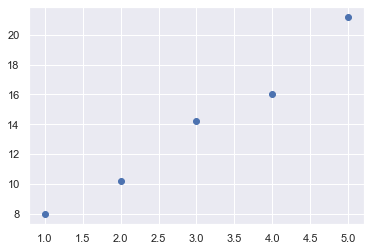

In [11]:
# Here we define the vectors F and l from the problem...
F = np.array([1,2,3,4,5])
l = np.array([7.97,10.2,14.2,16.0,21.2])

# ...and plot the data points.
plt.scatter(F,l)
plt.show()

In [12]:
# Using Scipy to calculate the values of e and k.
# This is just a sanity check, since we computed e and k by hand in the accompanying write-up.
from scipy.optimize import curve_fit

def f(x, A, B): 
    """Define the straight line"""
    return A*x + B

estimates, estimated_covariances = curve_fit(f, F, l) 

print(f"estimates: {estimates}")

estimates: [3.226 4.236]


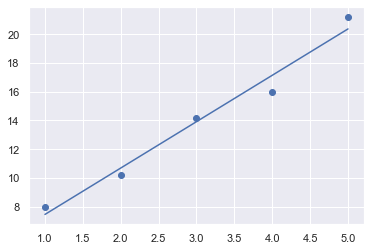

In [13]:
# An alternative library function calculation of the least squares equation is below.
# This function also plot the results. (Again, this is just a sanity check.)

from numpy.polynomial.polynomial import polyfit

b, m = polyfit(F, l, 1)

plt.scatter(F,l)
plt.plot(F, b + m * F, '-')
plt.show()

# Problem 1b.

In [14]:
# We now compute the values of e and k using SVD.
stub = np.array([1,1,1,1,1])

# First, we build a rank 1 matrix from the vector F;
F_prime = np.vstack((stub, F)).T

# Next, we store rank and ncols as follows:
n = F_prime.shape[1]
r = np.linalg.matrix_rank(F_prime)

# Now we compute the SVD
U, sigma, VT = np.linalg.svd(F_prime, full_matrices=False)

# build inverted matrix sigma^-
# one over each poitive singular value
sigma_1 = np.diag(np.hstack([1/sigma[:r], np.zeros(n-r)]))

# find V
V = VT.T

# Next, we compute the psuedo inverse of Sigma_1.
X_1 = V.dot(sigma_1).dot(U.T)

# And finally, we compute the solution (seen below):
w = X_1.dot(l)
print(w)

[4.236 3.226]


# Problem 2a-c.

/Users/Calum/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app


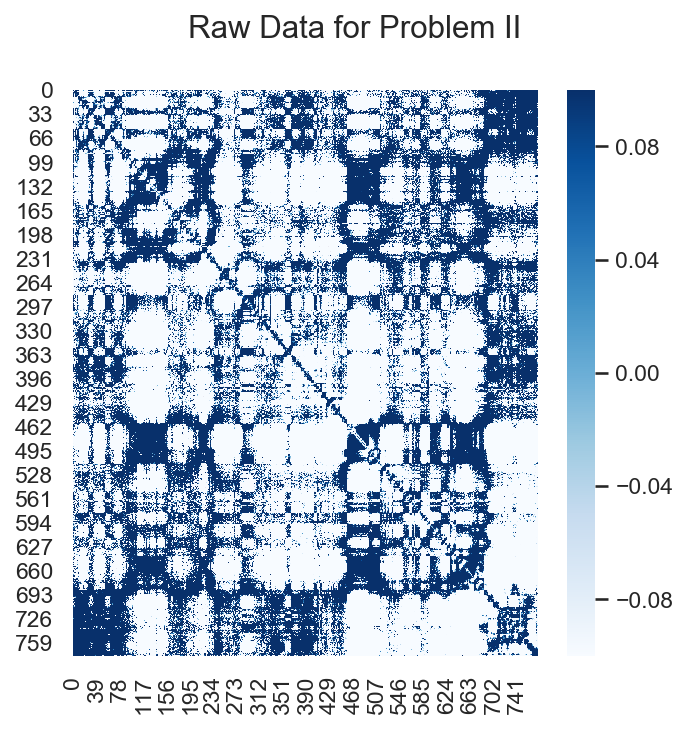

In [15]:
# Note: In this problem, several of the trickier bits of coding are due to Cooper Stansbury.

def load_data(filepath="data_mat.csv"):
    """A function to load the data matrix
    
    Args:
        - filepath (str): filepath of the data matrix
        
    Returns
        mat (2d np.array): a matrix with the data
    """
    return np.genfromtxt(filepath, delimiter=',')

W = load_data("data_mat.csv")
plotting_functions.plot_heatmap(np.log2(W), size=(5,5), dpi=150, 
             title="Raw Data for Problem II",
             cmap="Blues")

In [18]:
# Computing the degree matrix
def compute_D(W):
    D = np.zeros(W.shape)
    
    for i in range(0, len(W)):
        D[i,i] = np.sum(W[:,i])
        
    return D


D = compute_D(W)
print("Degree matrix:")
print(D)

# Computing the Laplacian matrix
L = D - W
print("Laplacian matrix:")
print(L)

e, v = np.linalg.eig(L)

# eigenvalues
print('eigenvalues:')
print(e)

# eigenvectors
print('eigenvectors:')
print(v)

Degree matrix:
[[1176.22240361    0.            0.         ...    0.
     0.            0.        ]
 [   0.         1164.31255791    0.         ...    0.
     0.            0.        ]
 [   0.            0.          933.4764884  ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ... 1067.27496494
     0.            0.        ]
 [   0.            0.            0.         ...    0.
  1159.58988226    0.        ]
 [   0.            0.            0.         ...    0.
     0.          673.20763298]]
Laplacian matrix:
[[ 1.17478540e+03 -1.74332680e+00 -1.98285530e+00 ... -3.53151130e+01
  -4.19872930e+01 -2.72337820e+01]
 [-1.74332680e+00  1.16289712e+03 -1.07463690e+00 ... -3.59497870e+01
  -3.87859000e+01 -2.24749870e+01]
 [-1.98285530e+00 -1.07463690e+00  9.32322499e+02 ... -2.52894920e+01
  -2.16473790e+01 -1.51430160e+01]
 ...
 [-3.53151130e+01 -3.59497870e+01 -2.52894920e+01 ...  1.06593227e+03
  -1.83195020e+00 -1.70335750e+00]
 [-4.19872930e+01 

In [36]:
# Here's a piece of code that's due to Cooper: the plotting function for our plots.

def build_fig(title="", axis_off=False, size=(10, 8), dpi=200, 
              y_lab="", x_lab=""):
    """A function to build a matplotlib figure. Primary
    goal is to sandardize the easy stuff.
    Args:
        - title (str): the title of the plot
        - axis_off (bool): should the axis be printed?
        - size (tuple): how big should the plot be?
        - y_lab (str): y axis label
        - x_lab (str): x axis label
    Returns:
        fig (plt.figure)
    """
    fig = plt.figure(figsize=size, 
                     facecolor='w',
                     dpi=dpi)
    fig.suptitle(title, fontsize=15)
    plt.xlabel(x_lab, fontsize=15)
    plt.ylabel(y_lab, fontsize=15)
    
    if axis_off:
        plt.axis('off')
    return fig

def plot_tnse(labels, points, **kwargs):
    """A function to plot cluster results in 2d space using tsne
    
    Args:
        - labels (np.array): array of int
        - points (nD np.array): an n-dimensional array
        
    Returns:
        - ax (plt.axes._subplots.AxesSubplot)
    """
    fig = build_fig(y_lab="TSNE-2", x_lab="TSNE-1", **kwargs)
    
    embedded = TSNE(n_components=2).fit_transform(points)
    
    shifted_labels = labels + 1
    
    sns.scatterplot(x=embedded[:,0], y=embedded[:,1], 
                    hue=shifted_labels, palette='Set1')
    
    return plt

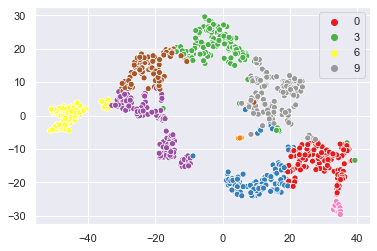

In [41]:
# Again, the following three algorithms were coded by Cooper. He's better with python! 

def normlize_rows(eigenvectors):
    """A fucntion to normalize eigenvectors
    row-wise across n eigenvectors
    
    Args:
        - eigenvectors (np.array): the n eigenvectors
    
    Returns:
        - T (np.array): eigenvectors normalized
    """
    T = np.zeros(eigenvectors.shape)
    for idx, row in enumerate(eigenvectors):
        T[idx] = abs(row / np.linalg.norm(row, ord=1))
    return T

# First algorithm, with accompanying plot.
def sp_clustering_1(k=9):
    """A function to compute the spectral
    clustering using the first method.
    
    N.B., steps 1-3 have already been performed. See above.
    
    1. Get adjencency matrix W
    2. Compute degree matrix D
    3. Compute L (unnormalized) 
    4. Get first k eigenvectors from L
    5. Let k eigenvectors be columns of U
    6. TODO
    7. Cluster U using k-means
    
    Args:
        - k (int): the number of clusters
        
    Returns:
        - clustrer labels
    """
    w, v = np.linalg.eig(L)
    
    v = v[:,0:k]
    
    cluster = KMeans(n_clusters=k).fit(v)
    return cluster.labels_, v

labels_1, eigenvectors_1 = sp_clustering_1(k=9)
cluster_3 = plot_tnse(labels_2, eigenvectors_2, 
                        title=f"TSNE Plot of Algorithm 3; k={9}")

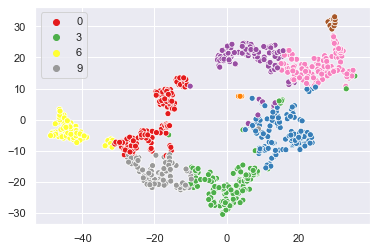

In [42]:
# Second algorithm, with plot. 

def sp_clustering_2(k=9):
    """A function to compute the spectral
    clustering using the first method.
    
    N.B., steps 1-3 have already been performed. See above.
    
    1. Get adjencency matrix W
    2. Compute degree matrix D
    3. Compute L (unnormalized) 
    4. Get first k eigenvectors from the generalized 
        `solution Lu = lambda Du`
    5. Let k eigenvectors be columns of U
    6. TODO
    7. Cluster U using k-means
    
    Args:
        - k (int): the number of clusters
        
    Returns:
        - clustrer labels
    """
    w, v = scipy.linalg.eigh(L, D, eigvals_only=False)
    v = v[:,0:k]
    
    cluster = KMeans(n_clusters=k).fit(v)
    return cluster.labels_, v

labels_2, eigenvectors_2 = sp_clustering_2(k=9)
cluster_2 = plot_tnse(labels_2, eigenvectors_2, 
                        title=f"TSNE Plot of Algorithm 3; k={9}")

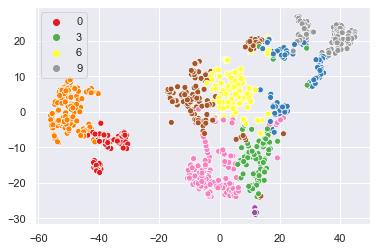

In [43]:
# Third algorithm with plot.



labels_3, eigenvectors_3 = sp_clustering_3(k=9)
cluster_3 = plot_tnse(labels_3, eigenvectors_3, 
                        title=f"TSNE Plot of Algorithm 3; k={9}")

## Speed tests for the algorithms

In [44]:
%%timeit
labels_1, eigenvectors_1 = sp_clustering_1()

638 ms ± 52.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
%%timeit
labels_2, eigenvectors_2 = sp_clustering_2()

352 ms ± 85.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
%%timeit
labels_3, eigenvectors_3 = sp_clustering_3()

1.34 s ± 76.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Problem 2d.

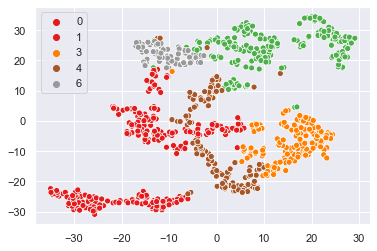

In [47]:
# Alternate clustering method 1: Affinity Propogation.

def spectral_affinity():
    """A function to detect the number of clusters present
    and perform aglorative clustering on results
    """
    A = load_data()
    _L = scipy.sparse.csgraph.laplacian(A, normed=True)
    
    af = AffinityPropagation(affinity='precomputed').fit(A)
    k = int(np.log2(len(set(af.labels_))))
    w, v = scipy.linalg.eigh(_L)

    _v = normlize_rows(v[:,0:k])
    cluster = AgglomerativeClustering(n_clusters=k).fit(_v)
    
    return cluster.labels_, _v

labels_af, eigenvectors_af = spectral_affinity()
tnse_af = plot_tnse(labels_af, eigenvectors_af, 
                        title=f"TSNE Plot of Affinity Propogation")